In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
heart_disease_df = pd.read_csv ('../Project-1/heart_2020_cleaned.csv')
heart_disease_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
heart_disease_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


SMOKERS WITH HEART DISEASE

In [43]:
smoking = heart_disease_df.loc[heart_disease_df["Smoking"]=="Yes"]
smoking.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No


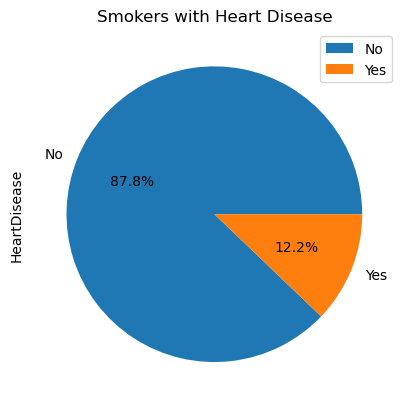

In [8]:
smoking.groupby("HeartDisease").aggregate({"HeartDisease":"count"}).plot(kind="pie", y="HeartDisease", title="Smokers with Heart Disease", autopct="%.1f%%")
plt.savefig("HeartDiseaseAmongstSmokers.png")

ALCOHOL DRINKERS WITH HEART DISEASE

In [11]:
alcohol_drinking= heart_disease_df.loc[heart_disease_df["AlcoholDrinking"]=="Yes"]
alcohol_drinking.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
55,No,24.02,No,Yes,No,7.0,0.0,No,Female,60-64,White,No,Yes,Excellent,6.0,No,No,No
142,Yes,31.48,No,Yes,Yes,20.0,20.0,Yes,Male,65-69,Black,No,No,Fair,7.0,Yes,No,No
176,No,46.87,Yes,Yes,No,0.0,3.0,No,Female,40-44,Black,No,No,Good,8.0,No,No,No
186,No,27.41,No,Yes,No,0.0,0.0,No,Male,65-69,White,Yes,No,Very good,6.0,No,No,No
201,No,22.05,Yes,Yes,No,0.0,0.0,No,Male,45-49,White,No,Yes,Very good,4.0,No,No,No


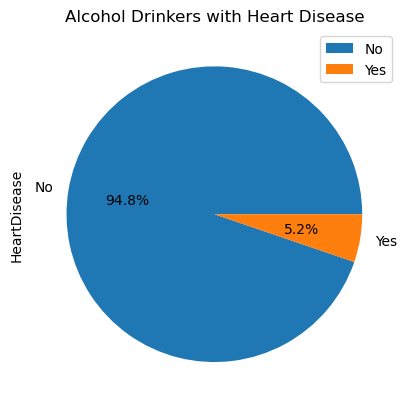

In [12]:
alcohol_drinking.groupby("HeartDisease").aggregate({"HeartDisease":"count"}).plot(kind="pie", y="HeartDisease", title="Alcohol Drinkers with Heart Disease", autopct="%.1f%%")
plt.savefig("HeartDiseaseAmongstAlcoholDrinkers.png")

In [13]:
yes_heart_disease= heart_disease_df.loc[heart_disease_df["HeartDisease"]=="Yes"]

In [14]:
no_heart_disease= heart_disease_df.loc[heart_disease_df["HeartDisease"]=="No"]

BMI AND HEART DISEASE

In [16]:
heart_disease_df["BMI"].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

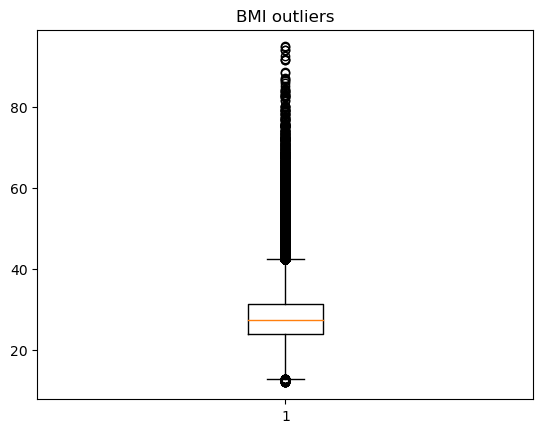

In [17]:
plt.boxplot(heart_disease_df["BMI"])
plt.title("BMI outliers")
plt.savefig("BMIoutliers.png")

Text(0.5, 1.0, 'With Heart Disease  Without Heart Disease')

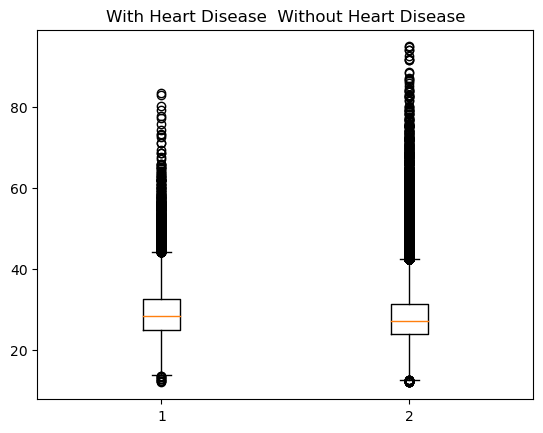

In [46]:
plt.boxplot([yes_heart_disease["BMI"],no_heart_disease["BMI"]])
plt.title("With Heart Disease  Without Heart Disease")

BMI categories;
under 18.5 – This is described as underweight.
between 18.5 and 24.9 – This is described as the 'healthy range'.
between 25 and 29.9 – This is described as overweight.
between 30 and 39.9 – This is described as obesity.
40 or over – This is described as severe obesity.

In [20]:
healthy_weight_BMI = heart_disease_df.loc[(heart_disease_df["BMI"]>=18.5) & (heart_disease_df["BMI"]<=24.9)]

In [21]:
over_weight_BMI = heart_disease_df.loc[heart_disease_df["BMI"] >=25.00]

In [22]:
under_weight_BMI = heart_disease_df.loc[heart_disease_df["BMI"] <18.5]

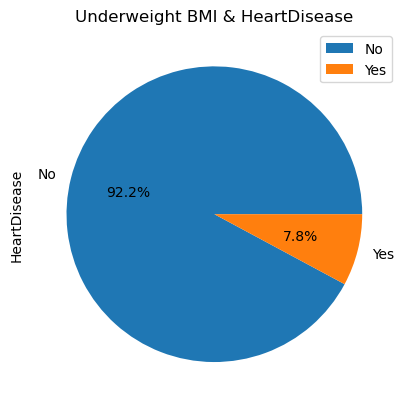

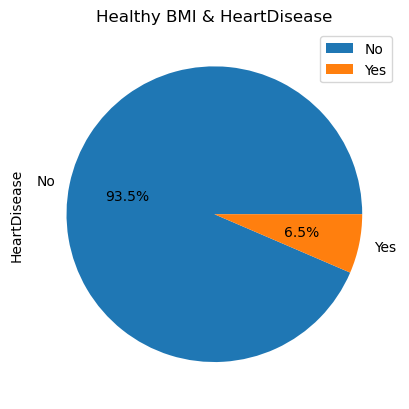

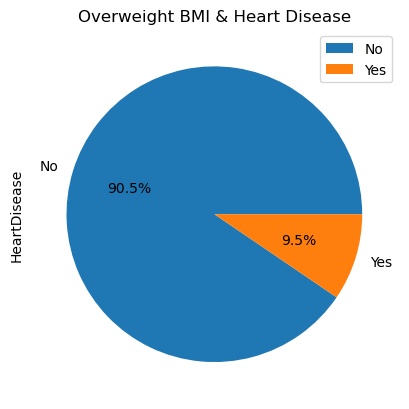

In [23]:
under_weight_BMI.groupby("HeartDisease").aggregate({"HeartDisease":"count"}).plot(kind="pie", y="HeartDisease", title="Underweight BMI & HeartDisease", autopct="%.1f%%")
plt.savefig("UnderweightBMI.png")
healthy_weight_BMI.groupby("HeartDisease").aggregate({"HeartDisease":"count"}).plot(kind="pie", y="HeartDisease", title="Healthy BMI & HeartDisease", autopct="%.1f%%")
plt.savefig("HealthyweightBMI.png")
over_weight_BMI.groupby("HeartDisease").aggregate({"HeartDisease":"count"}).plot(kind="pie", y="HeartDisease", title="Overweight BMI & Heart Disease", autopct="%.1f%%")
plt.savefig("OverweightBMI.png")

In [25]:
#linked underweight and overweight BMI
unhealthy_BMI = pd.concat([under_weight_BMI, over_weight_BMI])

In [26]:
#lowest BMI
unhealthy_BMI["BMI"].min()

12.02

In [27]:
#highest BMI
unhealthy_BMI["BMI"].max()

94.85

In [28]:
unhealthy_BMI_list=[]

In [29]:
for i in range(10):
    unhealthy_BMI_list.append(unhealthy_BMI.loc[(unhealthy_BMI["BMI"]>=10*i)&(unhealthy_BMI["BMI"]<=10*(i+1))])

In [30]:
len(unhealthy_BMI_list[1].loc[unhealthy_BMI_list[1]["HeartDisease"]=="Yes"])/len(unhealthy_BMI_list[1])

0.07847358121330725

In [31]:
unhealthy_BMI_heart_pct=[]

In [32]:
for i in range(1,10):
    unhealthy_BMI_heart_pct.append(100*len(unhealthy_BMI_list[i].loc[unhealthy_BMI_list[i]["HeartDisease"]=="Yes"])/len(unhealthy_BMI_list[i]))

In [33]:
unhealthy_BMI_heart_pct.pop()

0.0

In [34]:
unhealthy_BMI_heart_pct

[7.847358121330724,
 8.732122014528857,
 10.24719049160616,
 10.984575464898372,
 11.407407407407407,
 12.121212121212121,
 10.526315789473685,
 11.538461538461538]

R squared:0.6601520985896394


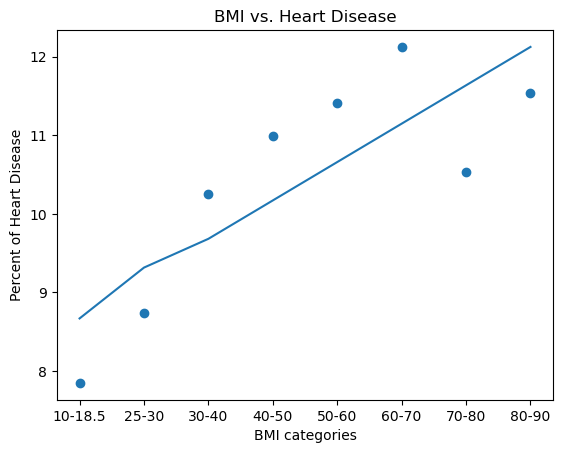

In [35]:
unhealthy_BMI_bin=["10-18.5", "25-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]
x=np.array([14.25, 27.5, 35, 45, 55, 65, 75, 85])
plt.scatter(unhealthy_BMI_bin, unhealthy_BMI_heart_pct)
plt.title("BMI vs. Heart Disease")
plt.xlabel("BMI categories")
plt.ylabel("Percent of Heart Disease")
line= st.linregress(x, unhealthy_BMI_heart_pct)
plt.plot(unhealthy_BMI_bin, line.slope*x+line.intercept)
print("R squared:" +str(line.rvalue**2))
plt.savefig("BMIvs.heartdisease.png")

ANALYZING DATA VIA TTESTS

In [36]:
st.ttest_ind(unhealthy_BMI["BMI"], healthy_weight_BMI["BMI"], equal_var=False)

Ttest_indResult(statistic=614.0664826312538, pvalue=0.0)

In [37]:
st.ttest_ind(no_heart_disease["BMI"], yes_heart_disease["BMI"])

Ttest_indResult(statistic=-29.33421693628801, pvalue=6.779455035549849e-189)

BMI vs. AGE GROUPS

In [38]:
BMI_age = heart_disease_df.groupby("AgeCategory").mean()["BMI"]

C:\Users\twsuz\AppData\Local\Temp\ipykernel_29372\4230376950.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  BMI_age = heart_disease_df.groupby("AgeCategory").mean()["BMI"]


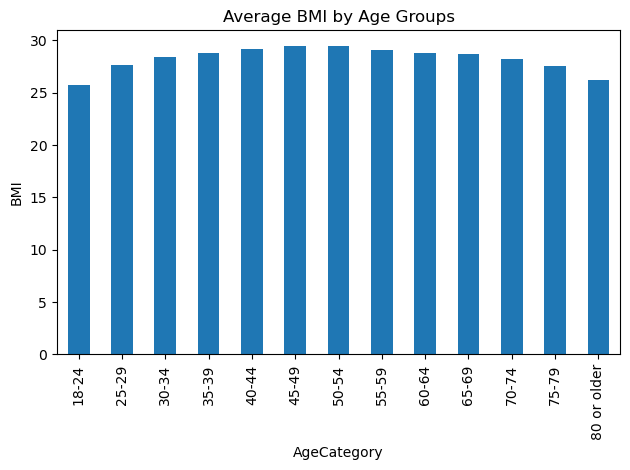

In [39]:
BMI_age.plot.bar()
plt.title("Average BMI by Age Groups")
plt.ylabel("BMI")
plt.tight_layout()
plt.savefig("AverageBMIByAgeGroups.png")
plt.show()